In [1]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle

In [4]:
# Load dataset
df = pickle.load(open("D:/Python project/CP/Narendra Modi/final_speech_modi_vector.pickle", 'rb'))
df

,index,Date,speech_number,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,...,dim_290,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299
0,NMS1,2017-01-03,1,-0.103082,-0.028219,0.081261,0.192965,-0.430750,0.066870,0.046552,...,0.160197,0.404465,-0.194165,-0.299626,0.365622,0.260677,0.179895,-0.005755,0.071091,0.004257
1,NMS2,2017-01-09,2,-0.104972,-0.019365,0.090733,0.200276,-0.438031,0.064260,0.046234,...,0.160290,0.406391,-0.188068,-0.295767,0.375116,0.266829,0.178182,-0.013259,0.066567,-0.005882
2,NMS3,2017-01-09,3,-0.118481,-0.041133,0.065573,0.214020,-0.441916,0.103635,0.040207,...,0.173008,0.399603,-0.218729,-0.318399,0.361028,0.242914,0.177553,0.007801,0.103556,0.020824
3,NMS4,2017-02-01,4,-0.121764,-0.009194,0.074031,0.214383,-0.430499,0.086467,0.046883,...,0.147746,0.385285,-0.193866,-0.299516,0.368556,0.237883,0.167815,-0.014544,0.089369,-0.001160
4,NMS5,2017-02-05,5,-0.132110,-0.011597,0.062680,0.204947,-0.420489,0.094942,0.045719,...,0.142861,0.380596,-0.194144,-0.311382,0.355122,0.220248,0.148518,-0.006693,0.107834,0.015469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,NMS1178,2023-04-09,1178,-0.119299,-0.023402,0.080732,0.233500,-0.440801,0.109343,0.038706,...,0.161151,0.384438,-0.200232,-0.302705,0.374287,0.245010,0.185391,-0.000489,0.085778,-0.007464
1178,NMS1179,2023-04-12,1179,-0.118719,-0.032235,0.095233,0.194540,-0.426096,0.061556,0.062392,...,0.157982,0.396139,-0.186654,-0.305853,0.357289,0.255308,0.174575,0.003781,0.076760,0.010639
1179,NMS1180,2023-04-12,1180,-0.154363,-0.020401,0.069727,0.247940,-0.451079,0.136225,0.042351,...,0.157647,0.375115,-0.218157,-0.331366,0.371119,0.206514,0.171878,0.010995,0.136866,0.014078
1180,NMS1181,2023-04-14,1181,-0.130176,-0.023241,0.107839,0.231411,-0.447362,0.086743,0.054660,...,0.166736,0.378829,-0.183809,-0.313226,0.358577,0.232161,0.184651,0.009555,0.103334,-0.000763


## Objective: To cluster the data using UMAPS
1. Use UMAPS to reduce the dimensionality of the data to 2 dimensions
2. Cluster the data
3. Embed Date information into the data
4. Plot the data giving each year a different color

In [6]:
%pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3551 sha256=6551ab50e7047a0509396f2a373eb420e7702af61c094c5211667fdc13028c31
  Stored in directory: c:\users\yatika arora\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Yatika Arora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
%pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 1.4 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/2.1 MB 1.0 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.1 MB 927.4 kB/s eta 0:00:02
     ----- ---------------------------------- 0.3/2.1 MB 905.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------- -------------------------------- 0.4/2.1 MB 791.2 kB/s eta 0:00:03
     ---------- ----------------------------- 0.5/2.1 MB 1.0 

In [10]:
from umap import UMAP

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\__init__.py)

### Dimensionality Reduction | UMAPS
Data Preprocessing:
1. Remove the columns that are not needed -- index, Date, speech_number

In [8]:
# Remove columns 0, 1, and 2 to create only dimension columns matrix
df_dim = df.drop(['index', 'Date', 'speech_number'], axis=1)
df_dim

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_290,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299
0,-0.103082,-0.028219,0.081261,0.192965,-0.430750,0.066870,0.046552,-0.290230,0.366887,-0.258423,...,0.160197,0.404465,-0.194165,-0.299626,0.365622,0.260677,0.179895,-0.005755,0.071091,0.004257
1,-0.104972,-0.019365,0.090733,0.200276,-0.438031,0.064260,0.046234,-0.305255,0.367291,-0.279142,...,0.160290,0.406391,-0.188068,-0.295767,0.375116,0.266829,0.178182,-0.013259,0.066567,-0.005882
2,-0.118481,-0.041133,0.065573,0.214020,-0.441916,0.103635,0.040207,-0.278846,0.369905,-0.242410,...,0.173008,0.399603,-0.218729,-0.318399,0.361028,0.242914,0.177553,0.007801,0.103556,0.020824
3,-0.121764,-0.009194,0.074031,0.214383,-0.430499,0.086467,0.046883,-0.279563,0.350474,-0.286919,...,0.147746,0.385285,-0.193866,-0.299516,0.368556,0.237883,0.167815,-0.014544,0.089369,-0.001160
4,-0.132110,-0.011597,0.062680,0.204947,-0.420489,0.094942,0.045719,-0.244959,0.348592,-0.259620,...,0.142861,0.380596,-0.194144,-0.311382,0.355122,0.220248,0.148518,-0.006693,0.107834,0.015469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,-0.119299,-0.023402,0.080732,0.233500,-0.440801,0.109343,0.038706,-0.309482,0.366080,-0.291375,...,0.161151,0.384438,-0.200232,-0.302705,0.374287,0.245010,0.185391,-0.000489,0.085778,-0.007464
1178,-0.118719,-0.032235,0.095233,0.194540,-0.426096,0.061556,0.062392,-0.278654,0.374048,-0.252167,...,0.157982,0.396139,-0.186654,-0.305853,0.357289,0.255308,0.174575,0.003781,0.076760,0.010639
1179,-0.154363,-0.020401,0.069727,0.247940,-0.451079,0.136225,0.042351,-0.265898,0.366019,-0.280579,...,0.157647,0.375115,-0.218157,-0.331366,0.371119,0.206514,0.171878,0.010995,0.136866,0.014078
1180,-0.130176,-0.023241,0.107839,0.231411,-0.447362,0.086743,0.054660,-0.291800,0.379736,-0.275288,...,0.166736,0.378829,-0.183809,-0.313226,0.358577,0.232161,0.184651,0.009555,0.103334,-0.000763


In [9]:
# Load the UMAP model
umap = UMAP(n_components=2, random_state=42)

In [17]:
# create a new dataframe and Apply the UMAP model to the dimension columns matrix
df_umap = pd.DataFrame(umap.transform(df_dim), columns=['x', 'y'])

In [19]:
# Plot the UMAP model
import matplotlib.pyplot as plt

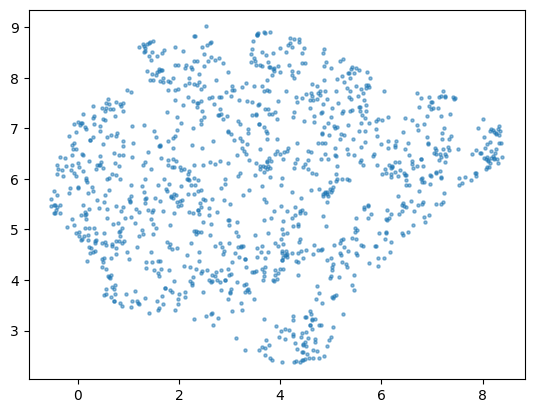

In [21]:
# Plot the UMAP model
plt.scatter(df_umap['x'], df_umap['y'], s=5, alpha=0.5)
plt.show()

In [26]:
# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap, df['Date']], axis=1)
# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

In [27]:
df_dim_date

,x,y,Date
0,0.303750,6.833558,2017.0
1,1.660266,8.481984,2017.0
2,3.170276,4.875130,2017.0
3,2.174431,6.093403,2017.0
4,2.220743,3.981250,2017.0
...,...,...,...
1177,0.252177,6.763053,2023.0
1178,5.903586,4.663988,2023.0
1179,3.055307,7.759151,2023.0
1180,-0.464587,5.756867,2023.0


In [33]:
# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

In [34]:
# Print unique years
df_dim_date['Date'].unique()

array([2017., 2018., 2019., 2020., 2021., 2022., 2023.])

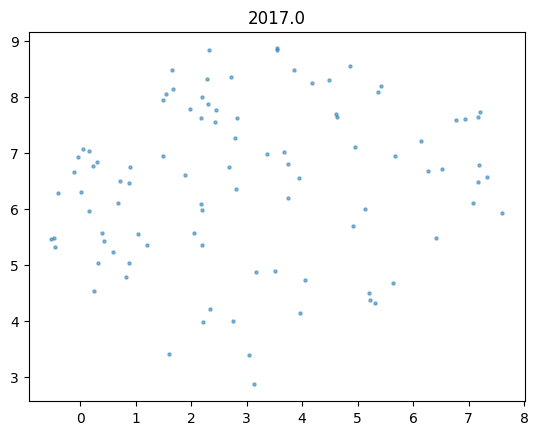

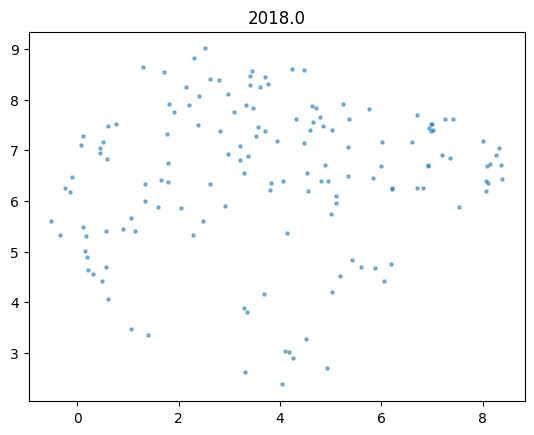

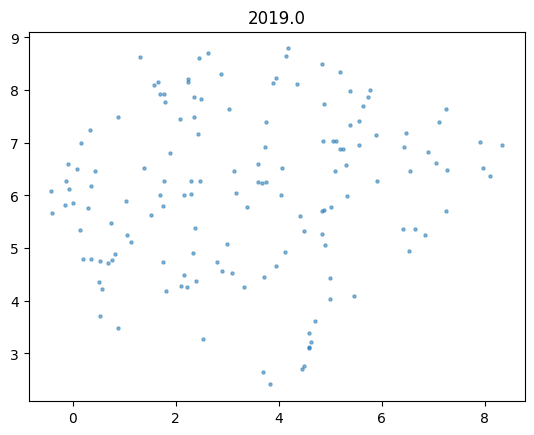

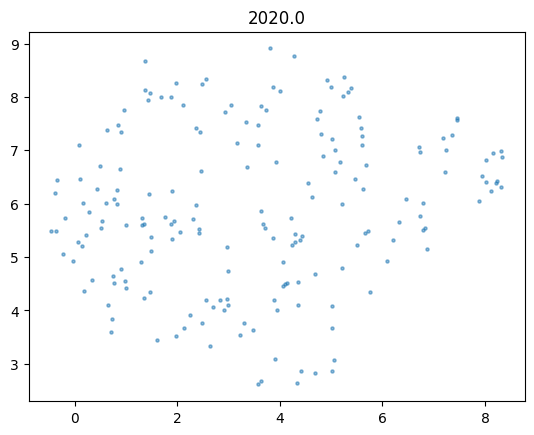

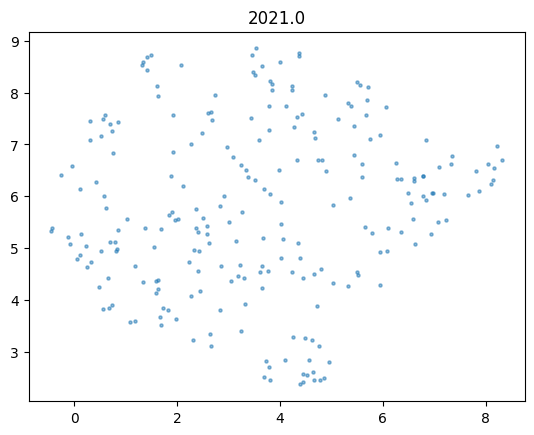

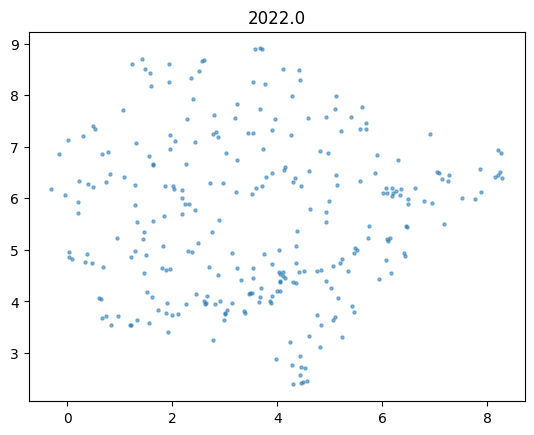

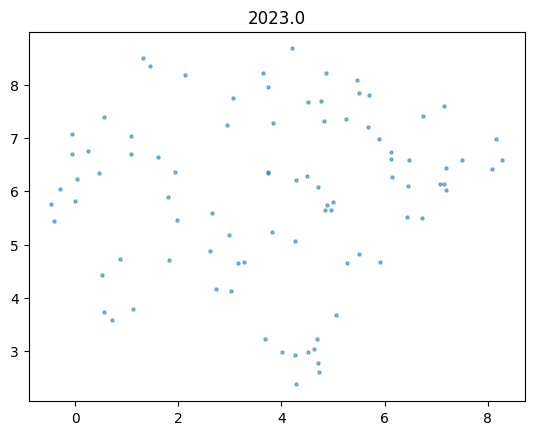

In [35]:
# Plot the UMAP model sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()

### Clustering
1. Use KMeans to cluster the data

In [43]:
# import the KMeans model
from sklearn.cluster import KMeans

In [44]:
df_umap.head()

,x,y
0,0.303750,6.833558
1,1.660266,8.481984
2,3.170276,4.875130
3,2.174431,6.093403
4,2.220743,3.981250


In [45]:
# Unique years
df_dim_date['Date'].unique()

array([2017., 2018., 2019., 2020., 2021., 2022., 2023.])

We idealy want clusters for each year.
We will use the elbow method to determine the number of clusters
Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. It is a heuristic method to estimate the optimal number of clusters in a data set given by the sum of squared errors (SSE) within clusters.

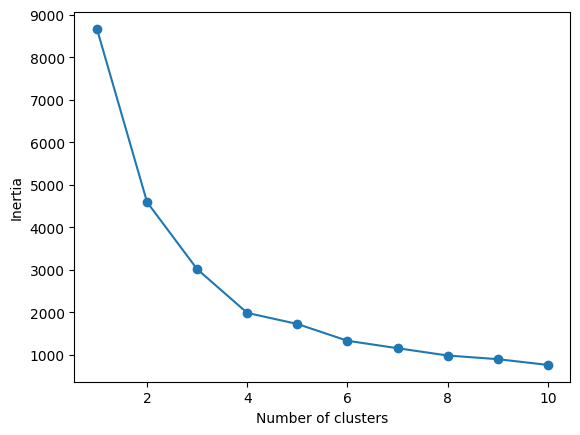

In [47]:
# Find the optimal number of clusters in df_umap using the elbow method
# Create a list of inertia values
inertia = []
for i in range(1, 11):
    # Create a KMeans instance with i clusters: model
    model = KMeans(n_clusters=i, random_state=42, n_init='auto')

    # Fit model to samples
    model.fit(df_umap)

    # Append the inertia to the list of inertia
    inertia.append(model.inertia_)

# Plot the inertia vs number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Here a decrease in the SSE is observed as the number of clusters increases. The point where the SSE curve starts to bend is considered as the optimal number of clusters. 
In the plot below, the elbow is at k=4 indicating the optimal k for this dataset is 4.

In [48]:
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters=4, random_state=42, n_init='auto')
# Fit model to df_umap
model.fit(df_umap)

KMeans(n_clusters=4, n_init='auto', random_state=42)

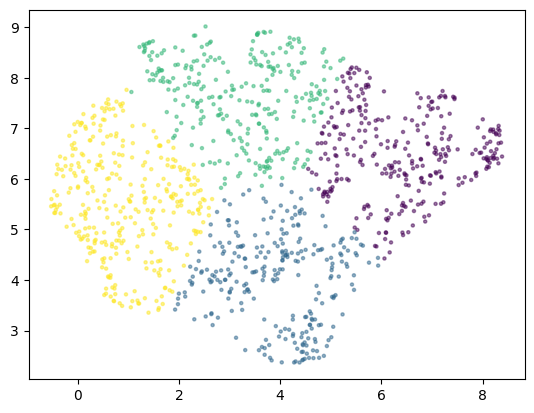

In [49]:
# Plot the clusters
plt.scatter(df_umap['x'], df_umap['y'], c=model.labels_, s=5, alpha=0.5)

In [50]:
# Append the cluster label to the dataframe of df_dim_date
df_dim_date['cluster'] = model.labels_
df_dim_date

C:\Users\hp\AppData\Local\Temp\ipykernel_22332\58067585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dim_date['cluster'] = model.labels_


,x,y,Date,cluster
0,0.303750,6.833558,2017.0,3
1,1.660266,8.481984,2017.0,2
2,3.170276,4.875130,2017.0,1
3,2.174431,6.093403,2017.0,3
4,2.220743,3.981250,2017.0,1
...,...,...,...,...
1177,0.252177,6.763053,2023.0,2
1178,5.903586,4.663988,2023.0,3
1179,3.055307,7.759151,2023.0,0
1180,-0.464587,5.756867,2023.0,2


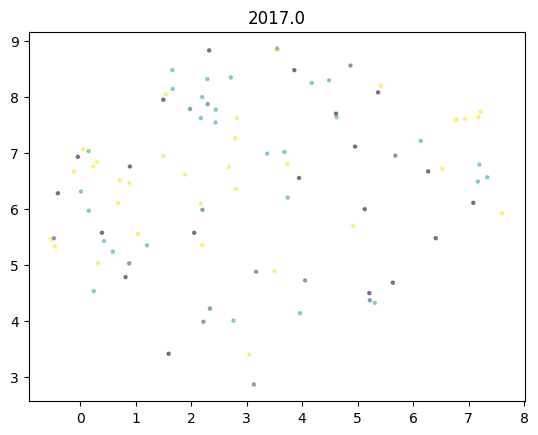

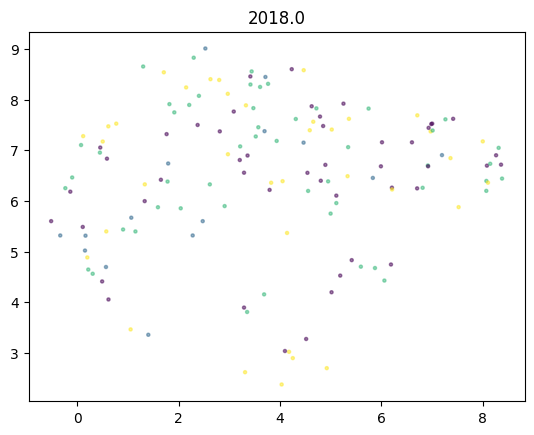

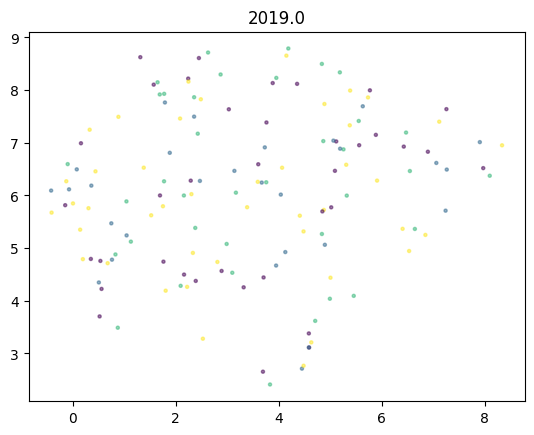

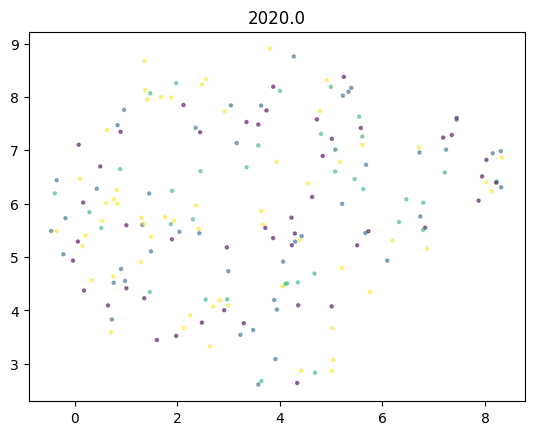

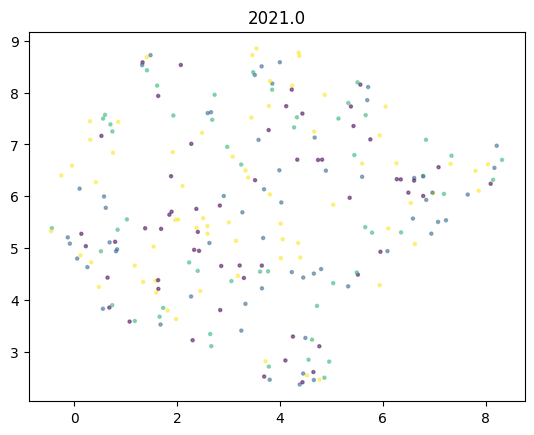

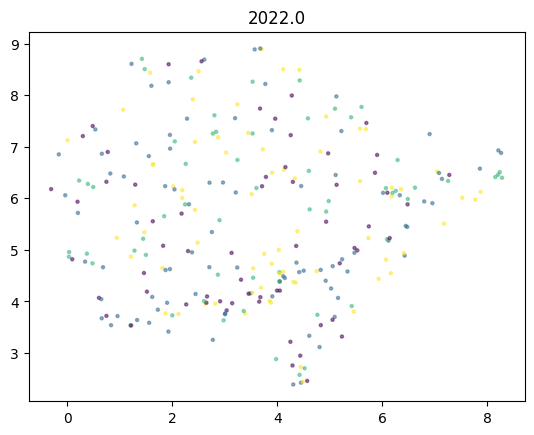

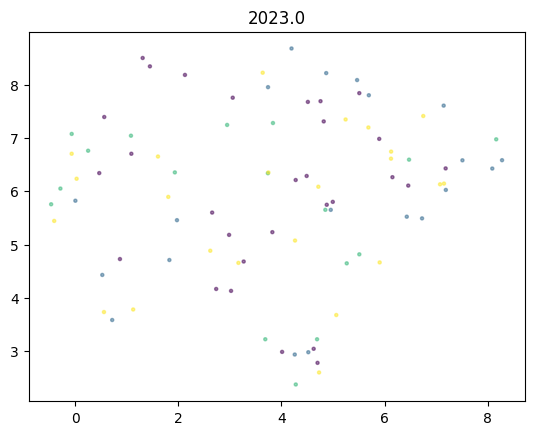

In [51]:
# Plot the clusters sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                c=df_dim_date[df_dim_date['Date'] == year]['cluster'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()
    

In above, we can clearly see that all clusters are more or less equally spreaded over the years.